# EBAC - Scripting


## Tarefa I

1. Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro (numa célula só ou em várias).  

2. Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.

Por favor insira o mês desejado (Ex: 01 para Jan), caso seja uma base geral insira 99: 06
Deseja realizar uma análise mensal ou anual? mensal
Qual mês deseja realizar a análise? (Ex: 01 para Jan) 06


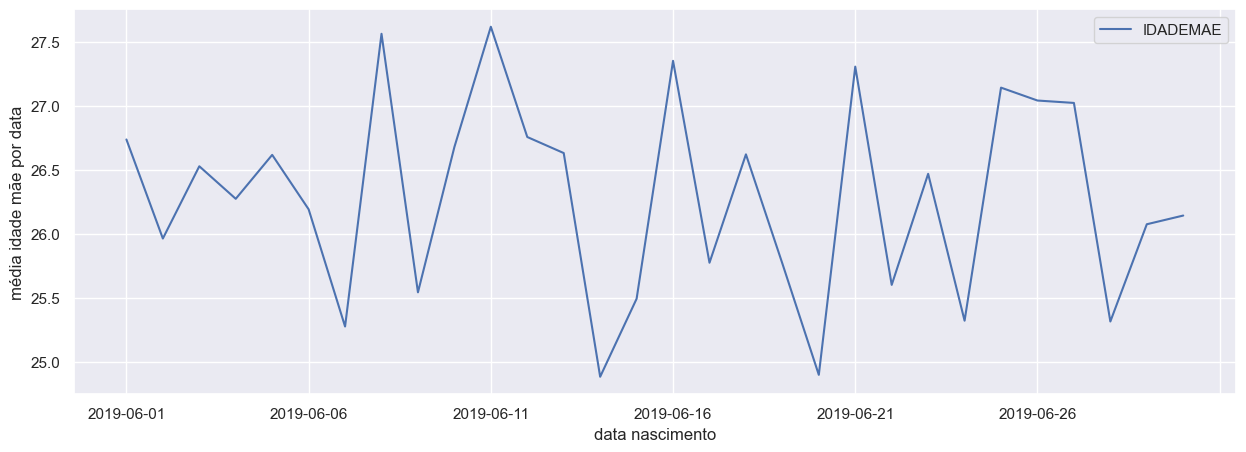

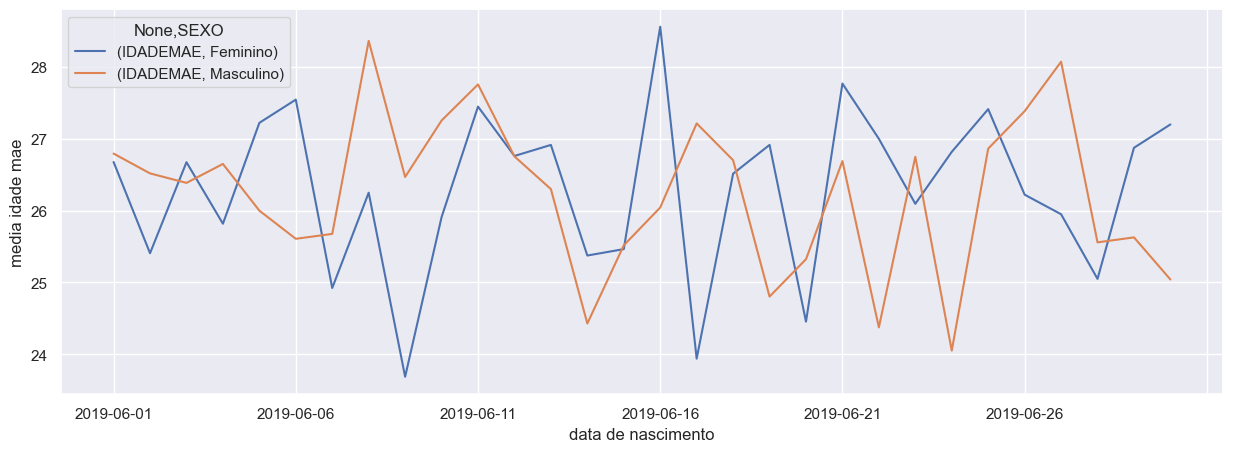

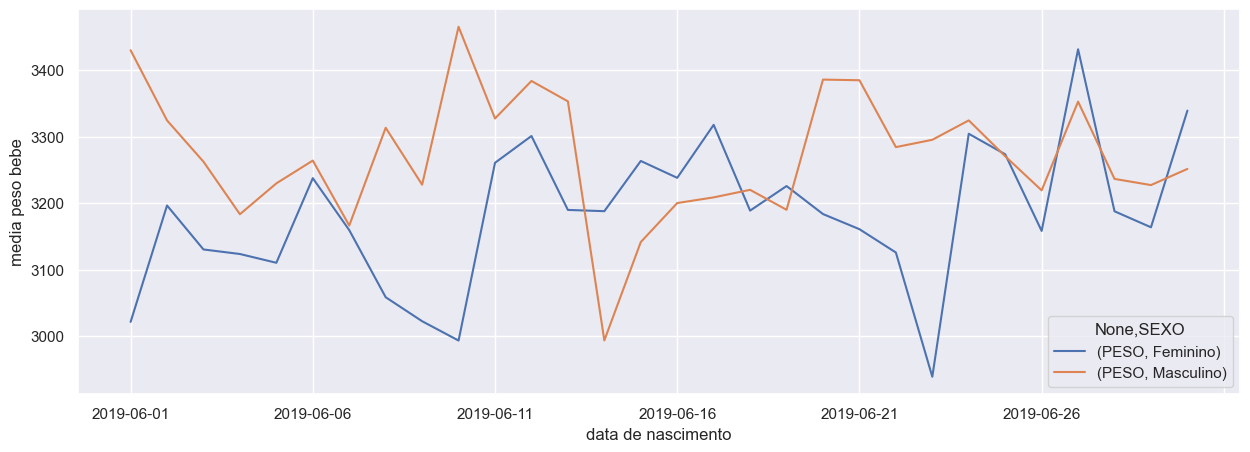

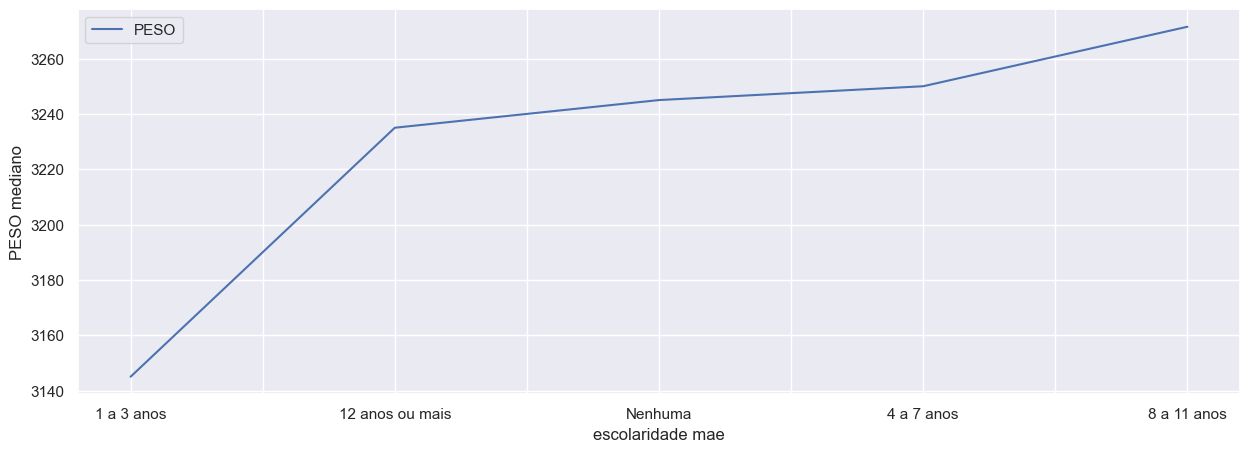

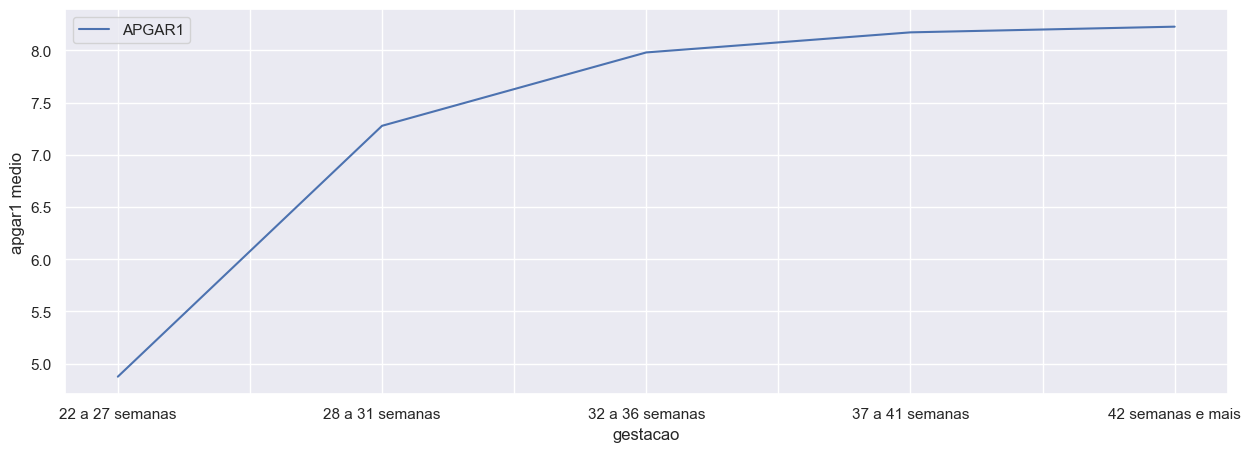

In [1]:
# Imports
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os

sns.set()

# Solicitando input do usuário
mes_base = input('Por favor insira o mês desejado (Ex: 01 para Jan), caso seja uma base geral insira 99: ')
analise = input('Deseja realizar uma análise mensal ou anual? ')
if analise == 'mensal':
    mes = input('Qual mês deseja realizar a análise? (Ex: 01 para Jan) ')
else:
    cond = input('Deseja fazer de um mês até o início do ano? (s/n): ')
    if cond == 's':
        mes = input('Qual mês deseja realizar a análise? (Ex: 01 para Jan) ')
    else:
        mes = 99

# Função
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# Dicionário dos meses do ano
meses = {'01':'JAN','02':'FEV','03':'MAR','04':'ABR','05':'MAI',
         '06':'JUN','07':'JUL','08':'AGO','09':'SET','10':'OUT',
         '11':'NOV','12':'DEZ'}

# Carregando dataset com base no input do usuário
if mes_base == '99':
    sinasc = pd.read_csv('./input/SINASC_RO_2019.csv')
else:
    sinasc = pd.read_csv('./input/SINASC_RO_2019_'+meses[mes_base]+'.csv')
    
# Convertendo para o formato datetime
sinasc['DTNASC_EDIT'] = pd.to_datetime(sinasc['DTNASC'], format='%Y-%m-%d')

# Convertendo o input para int
mes_int = int(mes)

# Filtrando Dataframe
if analise == 'anual':
    sinasc_filter = sinasc.loc[sinasc['DTNASC_EDIT'].dt.month <= mes_int]
else:
    sinasc_filter = sinasc.loc[sinasc['DTNASC_EDIT'].dt.month == mes_int]

# Criando variável max_data
if mes == '99':
    max_data = sinasc_filter.DTNASC.max()[:7]
elif mes_int < 10:
    max_data = (str(sinasc_filter.DTNASC_EDIT.dt.year.max())+'-0'+str(sinasc_filter.DTNASC_EDIT.dt.month.max()))
else:
    max_data = (str(sinasc_filter.DTNASC_EDIT.dt.year.max())+'-'+str(sinasc_filter.DTNASC_EDIT.dt.month.max()))

# Cria o diretório
os.makedirs('./output/figs/'+max_data+'-'+analise, exist_ok=True)

# Cria e salva os gráficos
plota_pivot_table(sinasc_filter, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/media idade mae por data.png')

plota_pivot_table(sinasc_filter, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/media idade mae por sexo.png')

plota_pivot_table(sinasc_filter, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc_filter, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/PESO mediano por escolaridade mae.png')

plota_pivot_table(sinasc_filter, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/media apgar1 por gestacao.png')

**SOBRE AUTOMATIZAÇÃO**

- Poderia ser automatizado melhor se fosse criado um executável. 
- Outro forma, seria a utilização de link's para baixar a informação direto da "fonte".


**ANÁLISE:**  

Construi o código de forma que pudesse automatizar a tarefa para todo o ano de 2019.
Caso necessário, podemos acrescentar os demais anos, para isso bastaria fazer o mesmo procedimento que foi feito com a variável mês para um nova variável chamada ano. 